In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Hent ut filene i dataframes

In [4]:
columns_rating = ['UserID', 'MovieID', 'Rating', 'Timestamp']
columns_user = ['UserID', 'Age', 'Gender', 'Occupation', 'Zip-code']
columns_movie = ['MovieID', "Title"]

df_rating = pd.read_csv('./ml-100k/u.data', sep='\t',
                            names=columns_rating, header=None, engine='python')
df_user = pd.read_csv('./ml-100k/u.user', sep='|',
                          names=columns_user, header=None, engine='python')

df_movie = pd.read_csv('./ml-100k/u.item', sep='|', encoding = "ISO-8859-1", usecols = [i for i in range(2)], header=None, engine='python', names=columns_movie)

print("Rating DataFrame")
print(df_rating)

Rating DataFrame
       UserID  MovieID  Rating  Timestamp
0         196      242       3  881250949
1         186      302       3  891717742
2          22      377       1  878887116
3         244       51       2  880606923
4         166      346       1  886397596
...       ...      ...     ...        ...
99995     880      476       3  880175444
99996     716      204       5  879795543
99997     276     1090       1  874795795
99998      13      225       2  882399156
99999      12      203       3  879959583

[100000 rows x 4 columns]


In [5]:
print("User DataFrame")
print(df_user)

User DataFrame
     UserID  Age Gender     Occupation Zip-code
0         1   24      M     technician    85711
1         2   53      F          other    94043
2         3   23      M         writer    32067
3         4   24      M     technician    43537
4         5   33      F          other    15213
..      ...  ...    ...            ...      ...
938     939   26      F        student    33319
939     940   32      M  administrator    02215
940     941   20      M        student    97229
941     942   48      F      librarian    78209
942     943   22      M        student    77841

[943 rows x 5 columns]


In [6]:
print("Movie DataFrame")
print(df_movie)

Movie DataFrame
      MovieID                                      Title
0           1                           Toy Story (1995)
1           2                           GoldenEye (1995)
2           3                          Four Rooms (1995)
3           4                          Get Shorty (1995)
4           5                             Copycat (1995)
...       ...                                        ...
1677     1678                          Mat' i syn (1997)
1678     1679                           B. Monkey (1998)
1679     1680                       Sliding Doors (1998)
1680     1681                        You So Crazy (1994)
1681     1682  Scream of Stone (Schrei aus Stein) (1991)

[1682 rows x 2 columns]


# Find Most Rated Movies

Text(0.5, 1.0, '15 most rated items')

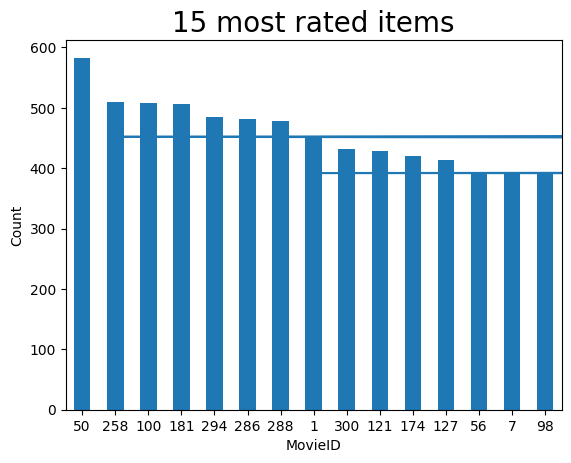

In [7]:
most_rated = df_rating['MovieID'].value_counts()[:15]
most_rated.plot.bar()
most_rated.plot(x="movie", y="count")
plt.xlabel("MovieID",  size = 10)
plt.ylabel("Count", size = 10)
plt.title("15 most rated items", size = 20)

# Distribution of Women vs Men

<Axes: xlabel='Gender', ylabel='count'>

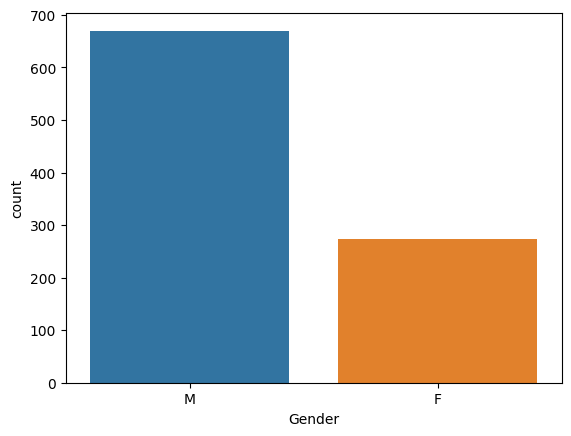

In [8]:
sns.countplot(x = df_user.Gender)

# Merge tables for ratings and users


In [9]:
df_classified_movies = pd.merge(df_rating, df_user, on="UserID")
df_classified_movies.sample(10)

,UserID,MovieID,Rating,Timestamp,Age,Gender,Occupation,Zip-code
26580,236,934,4,890117570,44,F,writer,53214
67819,619,363,2,885954215,17,M,student,44134
53771,476,393,4,883365135,28,M,student,60440
57353,506,261,3,885135514,46,M,programmer,03869
40041,373,217,3,877098821,24,F,other,55116
8657,249,181,3,879571998,25,M,student,84103
47481,425,121,4,878738813,19,M,student,58644
82909,774,743,1,888558623,30,M,student,80027
28218,164,689,5,889401490,47,M,healthcare,80123
4917,95,657,5,879198697,31,M,administrator,10707


# Distribution of different ratings

[Text(0.5, 1.0, 'Distribution of rating scores')]

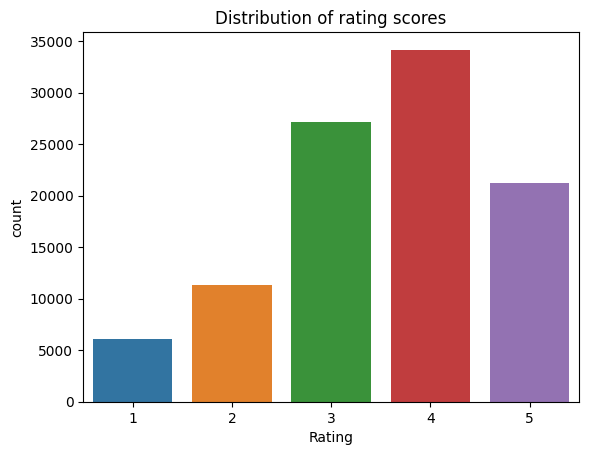

In [10]:
sns.countplot(x = df_classified_movies.Rating).set(title='Distribution of rating scores')

# Differences in ratings for men and women

In [11]:
# filter out those who did not enjoy each watched movie
df_classified_movies_gender = df_classified_movies[df_classified_movies['Rating'] > 3] 

df_classified_movies_gender = df_classified_movies.drop(['Age', 'Occupation', 'Zip-code', 'Rating', 'Timestamp', 'UserID'], axis=1)
df_classified_movies_gender.sample(10)


,MovieID,Gender
83608,905,F
1510,175,M
25560,744,M
66782,1172,M
97122,142,F
5056,228,M
74084,559,M
41489,99,M
55466,1,F
98321,515,M


In [12]:
df_classified_movies_gender.Gender = df_classified_movies_gender.Gender.replace({'M': 0, 'F': 1})
df_classified_movies_gender.sample(10)

,MovieID,Gender
60645,314,0
40910,216,0
26340,226,0
79214,144,0
87631,651,0
70943,231,0
17486,252,1
93052,739,0
31444,849,0
88827,151,0


In [13]:
df_classified_movies_gender = df_classified_movies_gender.groupby(df_classified_movies_gender.columns.tolist(),as_index=False).size()
df_classified_movies_gender


,MovieID,Gender,size
0,1,0,333
1,1,1,119
2,2,0,112
3,2,1,19
4,3,0,74
...,...,...,...
3134,1678,0,1
3135,1679,0,1
3136,1680,0,1
3137,1681,0,1


In [14]:
df_female = df_classified_movies_gender.loc[df_classified_movies_gender['Gender']==1]
df_male = df_classified_movies_gender.loc[df_classified_movies_gender['Gender']==0]

In [15]:
# unique_items = df_classified_movies_gender.MovieID.unique()

full_df = df_female.merge(df_male, how='outer', on="MovieID")
full_df = full_df.replace(np.nan, 0)
full_df[275:280]


,MovieID,Gender_x,size_x,Gender_y,size_y
275,277,1.0,25.0,0.0,46.0
276,278,1.0,36.0,0.0,24.0
277,279,1.0,11.0,0.0,17.0
278,280,1.0,38.0,0.0,47.0
279,281,1.0,38.0,0.0,108.0


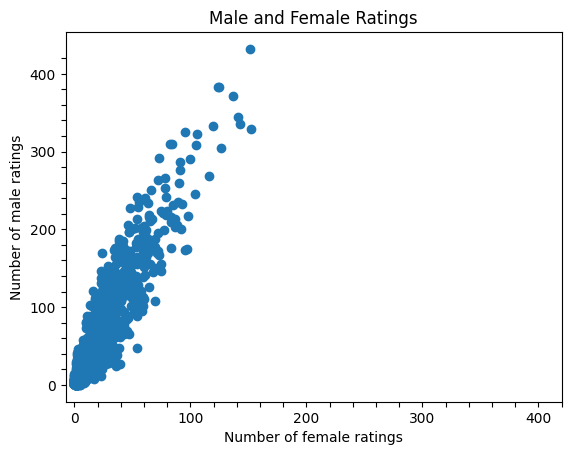

In [16]:
# plot
#X is female, Y is male
X = full_df['size_x'].values.tolist()
Y = full_df['size_y'].values.tolist()

plt.scatter(
   X,Y
)
ticks = np.arange(min(Y), max(Y)+1, 20)
ticks_label = ['{}'.format(int(num)) if num % 100 == 0 else '' for num in ticks]
plt.title("Male and Female Ratings")
plt.xlabel("Number of female ratings")
plt.ylabel("Number of male ratings")
plt.xticks(ticks, ticks_label)
plt.yticks(ticks, ticks_label)
plt.show()

In [17]:
most_liked_by_women = full_df.loc[full_df['size_x'] > full_df['size_y']]
most_liked_by_women['diff'] = most_liked_by_women['size_x'] - most_liked_by_women['size_y']
most_liked_by_women = most_liked_by_women.sort_values(by=['diff'], ascending=False).head(5)
most_liked_by_men = full_df.loc[full_df['size_x'] < full_df['size_y']]
most_liked_by_men['diff'] = most_liked_by_men['size_y'] - most_liked_by_men['size_x']
most_liked_by_men = most_liked_by_men.sort_values(by=['diff'], ascending=False).head(5)

print(most_liked_by_women)
print(most_liked_by_men)

      MovieID  Gender_x  size_x  Gender_y  size_y  diff
276       278       1.0    36.0       0.0    24.0  12.0
218       220       1.0    39.0       0.0    27.0  12.0
716       723       1.0    23.0       0.0    11.0  12.0
1036     1053       1.0    17.0       0.0     7.0  10.0
1401     1503       1.0     8.0       0.0     2.0   6.0
     MovieID  Gender_x  size_x  Gender_y  size_y   diff
49        50       1.0   151.0       0.0   432.0  281.0
179      181       1.0   124.0       0.0   383.0  259.0
99       100       1.0   125.0       0.0   383.0  258.0
256      258       1.0   137.0       0.0   372.0  235.0
172      174       1.0    95.0       0.0   325.0  230.0


/var/folders/7z/fqrlhdjd74l_vmy_6mxt5s540000gn/T/ipykernel_19660/4111024121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_liked_by_women['diff'] = most_liked_by_women['size_x'] - most_liked_by_women['size_y']
/var/folders/7z/fqrlhdjd74l_vmy_6mxt5s540000gn/T/ipykernel_19660/4111024121.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_liked_by_men['diff'] = most_liked_by_men['size_y'] - most_liked_by_men['size_x']


In [18]:
movies = []
movies.append(most_liked_by_women['MovieID'].values.tolist())
movies.append(most_liked_by_men['MovieID'].values.tolist())
# movies = list(np.concatenate(movies).flat)
movies = [str(item) for sublist in movies for item in sublist]
print(movies)

rating_counts = {
    "Men": [int(full_df.loc[full_df['MovieID'] == int(movie), 'size_y']) for movie in movies],
    "Women": [int(full_df.loc[full_df['MovieID'] == int(movie), 'size_x']) for movie in movies],
}
print(rating_counts)

['278', '220', '723', '1053', '1503', '50', '181', '100', '258', '174']
{'Men': [24, 27, 11, 7, 2, 432, 383, 383, 372, 325], 'Women': [36, 39, 23, 17, 8, 151, 124, 125, 137, 95]}


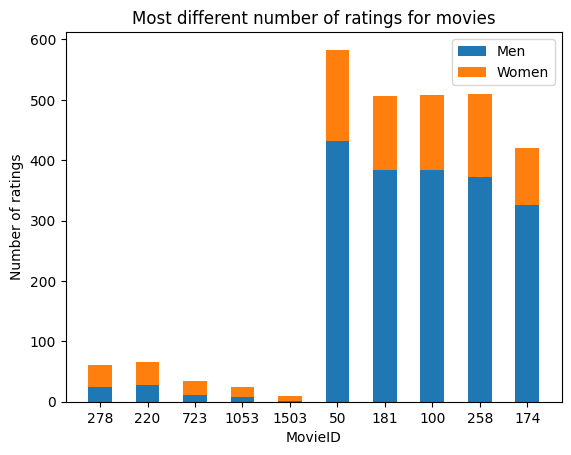

In [19]:
from matplotlib.ticker import AutoLocator

width = 0.5
fig, ax = plt.subplots()
bottom = np.zeros(10)

# movies_label = [df_movie.loc[df_movie['MovieID'] == int(movie), 'Title'].tolist() for movie in movies]

for gender, rating_count in rating_counts.items():
    p = ax.bar(movies, rating_count, width, label=gender, bottom=bottom)
    bottom += rating_count

ax.set_title("Most different number of ratings for movies")
ax.legend(loc="upper right")
plt.xlabel("MovieID")
plt.ylabel("Number of ratings")


plt.show()

In [20]:
print([df_movie.loc[df_movie['MovieID'] == int(movie), 'Title'].tolist() for movie in movies])

[['Bed of Roses (1996)'], ['Mirror Has Two Faces, The (1996)'], ['Boys on the Side (1995)'], ['Now and Then (1995)'], ['Gold Diggers: The Secret of Bear Mountain (1995)'], ['Star Wars (1977)'], ['Return of the Jedi (1983)'], ['Fargo (1996)'], ['Contact (1997)'], ['Raiders of the Lost Ark (1981)']]


# New preprocessed dataset
Ratings under 3 is removed and users with less than 20 ratings are removed.

In [21]:
df_preprocessed = df_classified_movies.copy()

In [22]:
df_preprocessed = df_preprocessed[df_preprocessed['Rating']>= 3]
values = df_preprocessed['UserID'].value_counts().keys().tolist()
counts = df_preprocessed['UserID'].value_counts().tolist()


In [23]:
users_2_keep = []
for (uid, numrating) in zip(values, counts):
    if  numrating >= 20:
        users_2_keep.append(uid)

df_preprocessed = df_preprocessed[df_preprocessed['UserID'].isin(users_2_keep)]

Check ratings

[Text(0.5, 1.0, 'Distribution of rating scores')]

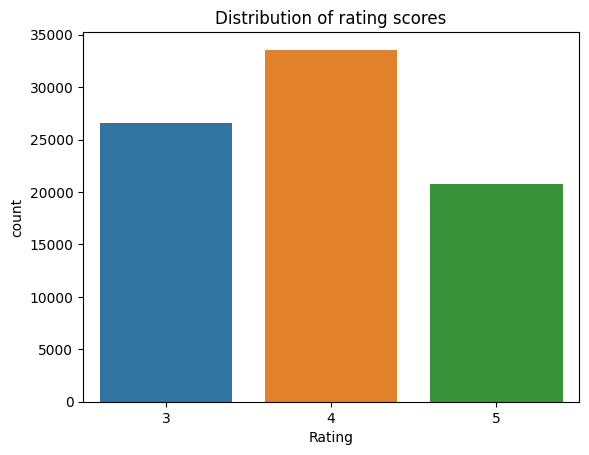

In [24]:
sns.countplot(x = df_preprocessed.Rating).set(title='Distribution of rating scores')

Check numbers

In [25]:
print(df_preprocessed['UserID'].nunique())
print(df_preprocessed['MovieID'].nunique())
print(len(df_preprocessed.index))

845
1574
80962


In [27]:
print(df_preprocessed['UserID'].max())


943


[Text(0.5, 1.0, 'Gender distribution of ratings in preprocessed data')]

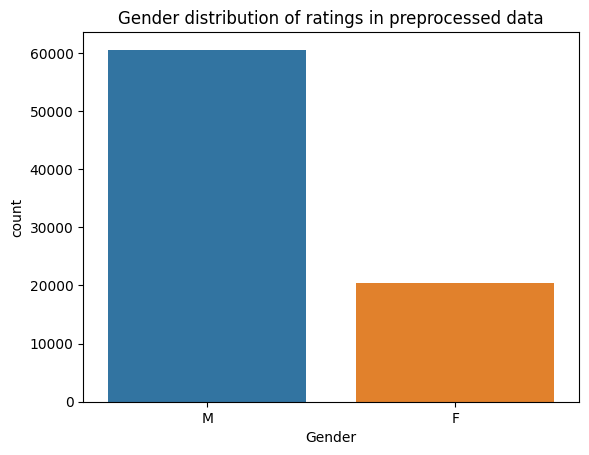

In [26]:
sns.countplot(x = df_preprocessed.Gender).set(title='Gender distribution of ratings in preprocessed data')

# Statistics for train_n_val_n_dislikes

In [2]:
columns_rating = ['UserID', 'MovieID', 'Rating', 'Timestamp']

df_rating = pd.read_csv('./splits/train_n_val_n_dislikes.tsv', sep='\t',
                            names=columns_rating, header=None, engine='python')

In [3]:
# hvor mange items har fått score 1 og hvor mange har fått 2?
df_score1 = df_rating[df_rating['Rating']== 1]
df_score2 = df_rating[df_rating['Rating']== 2]

In [5]:
most_rated_with1 = df_score1['MovieID'].value_counts()
most_rated_with1

76      39
340     34
327     34
350     34
625     32
        ..
814      1
1236     1
861      1
628      1
771      1
Name: MovieID, Length: 1272, dtype: int64

In [6]:
most_rated_with2 = df_score2['MovieID'].value_counts()
most_rated_with2

332     69
76      66
82      59
111     54
542     54
        ..
200      1
761      1
925      1
821      1
1520     1
Name: MovieID, Length: 1284, dtype: int64

In [7]:
df_score5 = df_rating[df_rating['Rating']== 5]
df_score4 = df_rating[df_rating['Rating']== 4]

In [8]:
most_rated_with5 = df_score5['MovieID'].value_counts()
most_rated_with5

297     300
37      214
156     198
81      194
177     174
       ... 
642       1
1333      1
471       1
787       1
817       1
Name: MovieID, Length: 1119, dtype: int64

In [9]:
most_rated_with4 = df_score4['MovieID'].value_counts()
most_rated_with4

39      190
17      185
127     181
37      171
297     163
       ... 
1448      1
1449      1
1297      1
1451      1
1399      1
Name: MovieID, Length: 1324, dtype: int64